# **PCLab#1 - Group 2 - Morresi Masia Valdo**

*This notebook contains the performance of the tasks of the first lab of the **Finance with Big Data course**. The context of the participants' activities revolves around their recent hiring by an established **Asset Management company**. Their team is entrusted with the management of a regulated mutual fund. Specifically, the fund manager has tasked them with determining the **optimal weights to construct a tangency portfolio** composed of selected securities, for which their broker does not impose any transaction fees.*

## **Task #1**: Import the data and describe the sample

### Load data

In [77]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [78]:
# Import and show the dataframe containing stocks' informations

df = pd.read_csv('./data/Data_PCLab1_Stock.csv')
df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [79]:
print(f'The dataset contains {df.shape[0]} observations.')

The dataset contains 2159 observations.


### Sort the stock data by date and print the number of stocks

In [80]:
df = df.sort_values(by=['Date'])
df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

To find how many stocks we have in the dataset, we count the columns of the dataset **without the `Date` column**. Then we **subtract one** from the result because we also have the column for the S&P500 index.

In [81]:
print(f'The dataset has {len(df.drop("Date", axis=1).columns)-1} stocks plus the S&P500.')

The dataset has 8 stocks plus the S&P500.


### Check if data contains any null values

If our dataset contains *null values*, we would either **impute the missing data using suitable statistical measures** or **remove rows or columns with a substantial amount of missing values** for a cleaner analysis and modeling approach.

In [82]:
df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [83]:
print(f'The dataset has {df.isnull().sum().sum()} missing values.')

The dataset has 0 missing values.


Thankfully, the dataset doesn't contain null values.

### What is the average market value of the S&P500?

In [84]:
print(f'The average market value of the S&P500 is {round(df.sp500.mean(), 2)}$')

The average market value of the S&P500 is 2218.75$


### Which stock or index has the minimum dispersion in dollar value?

In [85]:
df.drop(['Date', 'sp500'], axis=1).var()

AAPL      5016.549110
BA       10749.249190
T           10.287991
MGM         48.495166
AMZN    486979.137239
IBM        653.412664
TSLA     44515.937383
GOOG    111855.502794
dtype: float64

In [86]:
print(f'The stock with the minimum dispersion in dollar value is {df.drop(["Date", "sp500"], axis=1).var().idxmin()}')

The stock with the minimum dispersion in dollar value is T


It means that AT&T may have a **stable stock price** over a defined period, or **consistent earnings** and **financial performance**, providing a *lower dispersion* in dollar value compared to other stocks considered.

Furthermore, this lower variance may be due to the price of the stock being **lower than other stocks** considered, which would result in a lower dispersion in dollar value.

### What is the maximum price for Amazon stock over the specified time period?

In [87]:
print(f'The maximum price of the Amazon stock is {round(df.AMZN.max(), 2)}$')

The maximum price of the Amazon stock is 3225.0$


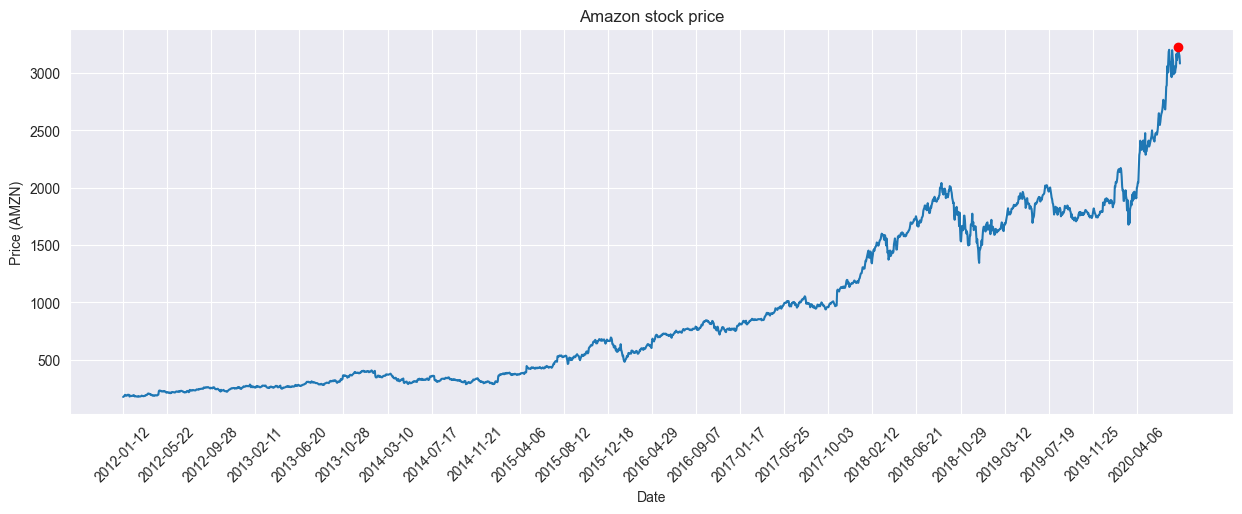

In [88]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='AMZN')
plt.plot(df.AMZN.idxmax(), df.AMZN.max(), 'ro')
plt.title('Amazon stock price')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(df), step=3*30), rotation=45)
plt.ylabel('Price (AMZN)')
plt.show()

In [89]:
amzn_max_price = df.Date[df.AMZN.idxmax()]

print(f'The maximum price of the Amazon stock is reached on {amzn_max_price}.')

The maximum price of the Amazon stock is reached on 2020-08-06.


## **Task #2**: Plot the data

### Define a function to plot the entire dataframe

Here, we are defining a *function* called **`plot_df`** that takes a dataframe and the y label as input and plots the dataframe with the y label on the y axis. This comes in handy when we want to plot the data for variables other than the absolute stock price.

In [90]:
def plot_df(df, ylabel='Price ($)'):
    
    plt.figure(figsize=(15, 5))
    sns.color_palette("husl", 9)
    sns.set_style("darkgrid")

    for i in df.drop(['Date'], axis=1).columns:  # Loop through the columns of the dataset
        sns.lineplot(data=df, x='Date', y=i, label=i)   # Plot the data and set a label for the legend for each stock in the dataset
    
    plt.title('Stock prices')
    plt.xlabel('Date')
    plt.xticks(np.arange(0, len(df), step=3*30), rotation=45)   # Set the xticks to be every 90 days
    plt.ylabel(ylabel)
    plt.show()

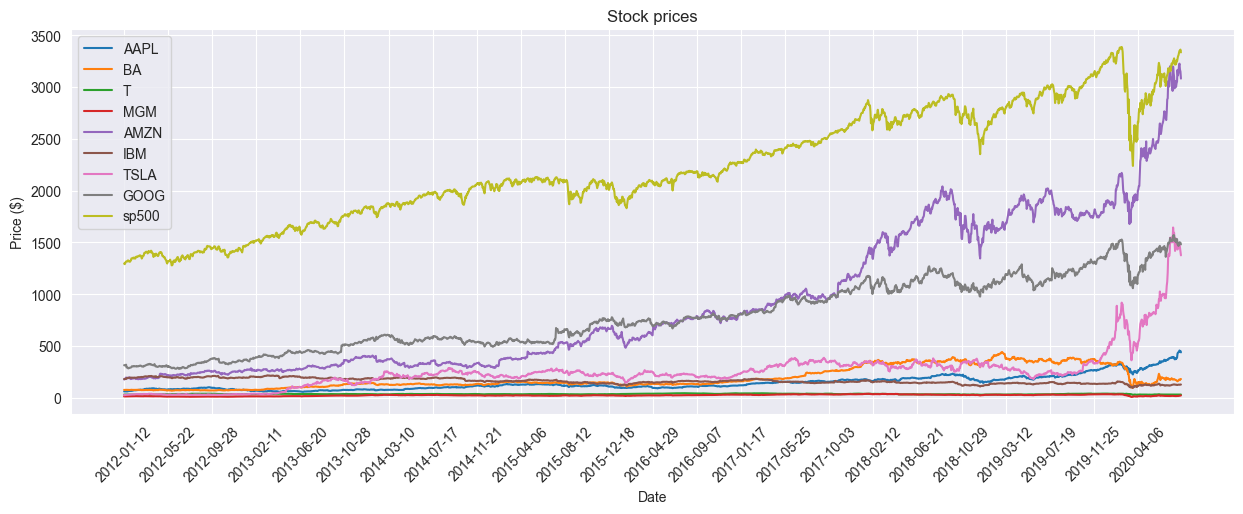

In [91]:
plot_df(df)


This plot of stock prices provides us a visual understanding of **trends**, **volatility**, and the **impact of events**. 

## **Task #3**: Print out normalized (scaled) stock prices

### Define a function to normalize the prices based on the initial price

In [92]:
def norm(df):
    return df/df.iloc[0]

In [93]:
df_norm = norm(df.drop(['Date'], axis=1))
df_norm['Date'] = df['Date']
df_norm = df_norm[['Date', 'AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']]
df_norm.head()

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0  2012-01-12  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  2012-01-13  0.996251  0.987949  0.998340  1.018137  1.014153  0.992301   
2  2012-01-17  1.007855  0.996424  1.004316  1.009893  1.032570  0.996954   
3  2012-01-18  1.018320  0.994040  1.006972  1.049464  1.076792  1.002880   
4  2012-01-19  1.015093  1.000662  1.009960  1.055235  1.105269  0.999834   

       TSLA      GOOG     sp500  
0  1.000000  1.000000  1.000000  
1  0.806726  0.992615  0.995052  
2  0.941593  0.998317  0.998587  
3  0.949027  1.005193  1.009680  
4  0.947257  1.015771  1.014666

### Plot normalized data

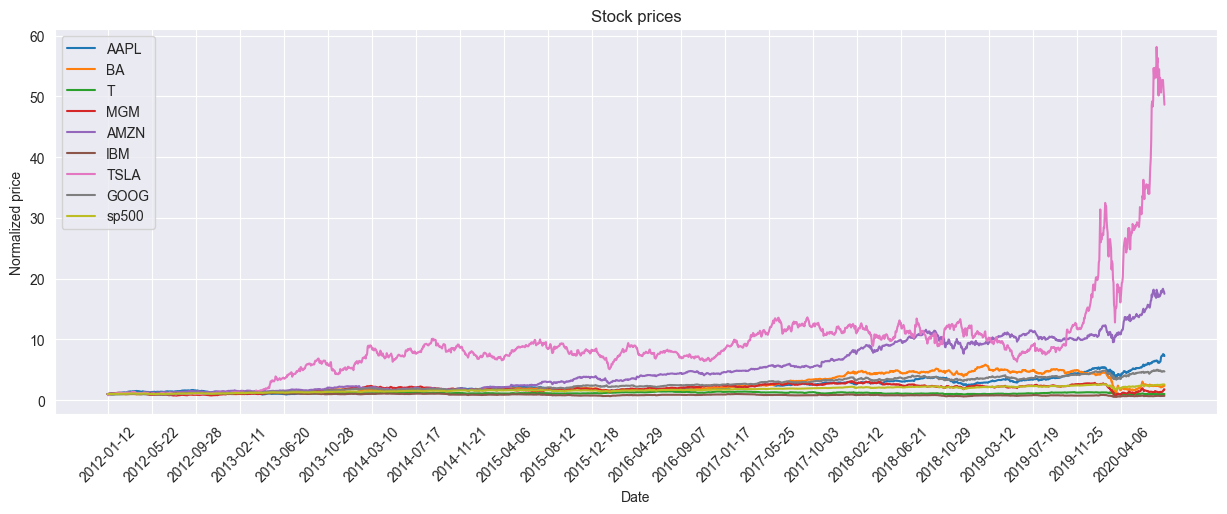

In [94]:
plot_df(df_norm, ylabel='Normalized price')

If we consider relative terms, **Tesla (TSLA)** is the stock that *grew the most in the sample period*, followed by Amazon (AMZN).

### **Optional**: Define a function to perform an interactive data plotting usingplotly express

In [95]:
def interactive_prices(df, title):

    fig = px.line(df, x='Date', y=df.columns[1:], title=title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [96]:
interactive_prices(df_norm, title='Normalized prices')

In this interactive plot we can see the **normalized stock prices** of the stocks in the dataset. We can **select** the stocks we want to see by clicking on the legend.

Doing so, we can inspect more carefully the **relative performance** of the stocks that had a slower growth in the previous plot.

In fact we can see that if we remove Testa and Amazon from the plot, Apple and Google have a **similar growth** in the sample period. On the other hand, BA and MGM have a **similar growth** in the sample period, but in the last two years (2019-2020), the stock prices fell sharply. Lastly, AT&T and IBM remained stable in the sample period.

The correlation between the prices of the stocks depends on the sector in which a company operates. In fact, Apple, Tesla, Google and Amazon grew constantly over the years, since they operate in the technology sector, renewing their products and services. On the other hand, BA and MGM, which operate in the travel and tourism sector, which did not prove so profitable in the last two years. Lastly, AT&T and IBM, which operate in the telecommunications and technology sector, remained stable in the sample period, since the sector is not as renewed as the technology sector.

## **Task #5**: Calculate stock returns (1)

### Define a function to calculate stocks daily returns (for all stocks)

The function **`daily_stock_returns`** takes a *dataframe* as input and returns a dataframe with the *daily returns of the stocks*. The function uses the **`pct_change`** method of the dataframe to calculate the daily returns. Returns are **multiplied by 100** to get the percentage returns.

In [97]:
def daily_stock_returns(df):
    dates = df['Date']
    df = df.drop(['Date'], axis=1).pct_change() * 100
    df.insert(0, 'Date', dates)
    return df

In [98]:
stock_returns = daily_stock_returns(df)
stock_returns.head()

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0  2012-01-12       NaN       NaN       NaN       NaN       NaN       NaN   
1  2012-01-13 -0.374946 -1.205144 -0.166006  1.813685  1.415339 -0.769869   
2  2012-01-17  1.164812  0.857909  0.598603 -0.809717  1.815943  0.468852   
3  2012-01-18  1.038382 -0.239234  0.264463  3.918367  4.282725  0.594448   
4  2012-01-19 -0.316937  0.666134  0.296736  0.549882  2.644634 -0.303752   

        TSLA      GOOG     sp500  
0        NaN       NaN       NaN  
1 -19.327430 -0.738516 -0.494792  
2  16.717854  0.574410  0.355295  
3   0.789470  0.688856  1.110793  
4  -0.186494  1.052283  0.493866

### Plot it!

The graph below shows the stocks daily return over the specified period.

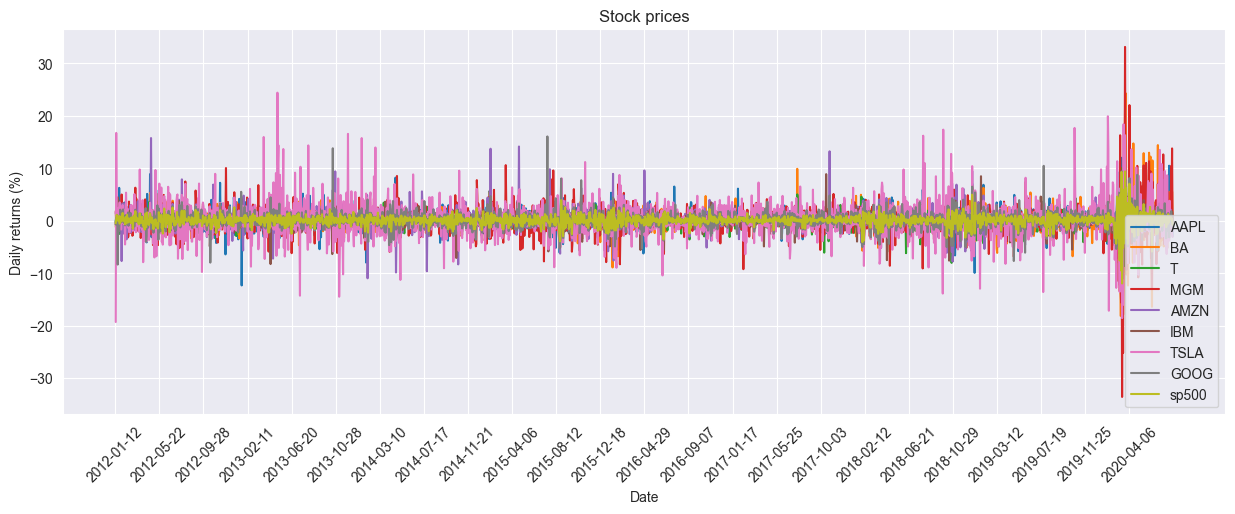

In [99]:
plot_df(stock_returns, ylabel='Daily returns (%)')

In [100]:
print(f'The highest daily return of the S&P500 is {round(stock_returns.sp500.max(), 2)}%',
      f'and it happened on {df.Date.iloc[stock_returns.sp500.idxmax()]}.')

The highest daily return of the S&P500 is 9.38% and it happened on 2020-03-24.


In [101]:
max_return       = stock_returns.drop(['Date', 'sp500'], axis=1).max().max()
max_return_stock = stock_returns.drop(['Date', 'sp500'], axis=1).max().idxmax()
max_return_date  = df.Date.iloc[stock_returns[max_return_stock].idxmax()]

print(f'The highest daily return is {round(max_return, 2)}%', 
      f'and it happened on {max_return_date} for stock {max_return_stock}.')

The highest daily return is 33.11% and it happened on 2020-03-24 for stock MGM.


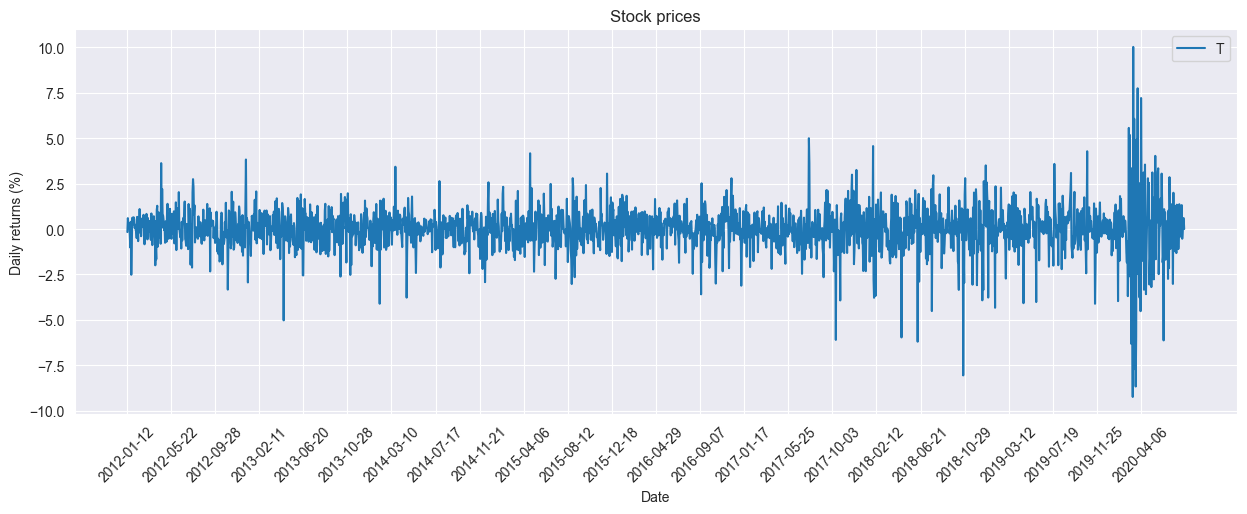

In [102]:
plot_df(stock_returns[['Date', 'T']], ylabel='Daily returns (%)') # Only for stock 'T'

## **Task #5**: Calculate stock returns (2)

### Calculate the correlations between daily returns

In [103]:
correlation_matrix = stock_returns.corr()
correlation_matrix

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
AAPL   1.000000  0.385249  0.341373  0.384088  0.410233  0.434534  0.288534   
BA     0.385249  1.000000  0.401602  0.554229  0.267466  0.479264  0.250946   
T      0.341373  0.401602  1.000000  0.340166  0.233145  0.484219  0.152515   
MGM    0.384088  0.554229  0.340166  1.000000  0.309016  0.441631  0.311879   
AMZN   0.410233  0.267466  0.233145  0.309016  1.000000  0.339589  0.310083   
IBM    0.434534  0.479264  0.484219  0.441631  0.339589  1.000000  0.245610   
TSLA   0.288534  0.250946  0.152515  0.311879  0.310083  0.245610  1.000000   
GOOG   0.509124  0.388048  0.353695  0.439141  0.575283  0.458816  0.322804   
sp500  0.657320  0.641826  0.617463  0.631449  0.539560  0.703935  0.387920   

           GOOG     sp500  
AAPL   0.509124  0.657320  
BA     0.388048  0.641826  
T      0.353695  0.617463  
MGM    0.439141  0.631449  
AMZN   0.575283  0.539560  
IBM    0.458816  0.703935  
TSLA   0.322804  0.387920  
GOOG   1.000000  0.684571  
sp500  0.684571  1.000000

### Plot the correlation table as in heat-map

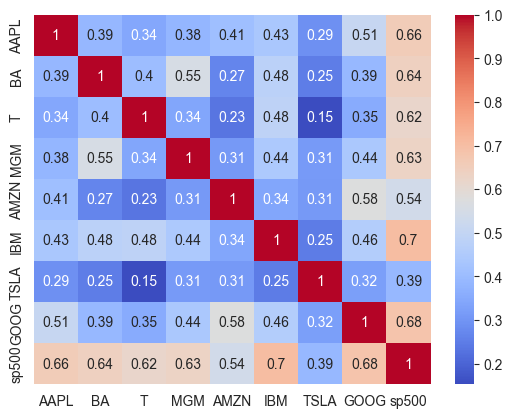

In [104]:
_ = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

All stocks but Tesla are positively (more than 0.5) correlated with the S&P 500. This means that when the S&P500 goes up, the other stocks tend to go up as well. Tesla, on the other hand, operates in the *electric vehicle and sustainable energy industry*, which may have **different market dynamics** influencing its stock compared to more traditional industries represented in the S&P 500. 

### What are the top 2 stocks that are positively correlated with the S&P500 ?

In [105]:
correlation_matrix['sp500'].sort_values(ascending=False)[1:3]

IBM     0.703935
GOOG    0.684571
Name: sp500, dtype: float64

In [106]:
print(f'The two most correlated stocks with the S&P 500 in the dataset are {correlation_matrix["sp500"].sort_values(ascending=False)[1:3].index[0]}',
      f'and {correlation_matrix["sp500"].sort_values(ascending=False)[1:3].index[1]}.')

The two most correlated stocks with the S&P 500 in the dataset are IBM and GOOG.


The strong correlation between IBM  and GOOG with the S&P 500 suggests that these companies' stock prices tend to move in a similar direction to the broader market.\
This correlation could be due to their **significant influence in the technology-related sectors**, as well as  their **impact on the overall market sentiment**.

### What is the correlation between Amazon and Boeing ? Comment on your answer

In [107]:
print(f"The correlation between Amazon and Boeing stocks is {round(correlation_matrix['AMZN']['BA'], 3)}.")

The correlation between Amazon and Boeing stocks is 0.267.


The moderate/low correlation of approximately **0.267** between Amazon and Boeing primarily stems from their *shared exposure* to **systematic risk**, a factor affecting the entire market and beyond diversification's control. This correlation reflects how both companies are influenced by broader economic conditions, market trends, and systemic events, impacting their stock prices in a somewhat synchronized manner.

Conversely, the low correlation in **idiosyncratic risks** for these firms, owing to their distinct operating sectors, highlights the uniqueness of risks specific to each company. Amazon, a dominant force in e-commerce and technology, faces industry-specific risks tied to consumer behavior, e-commerce dynamics, and online market shifts. On the other hand, Boeing, operating in the aerospace and defense sector, grapples with risks linked to aviation markets, defense contracts, regulatory frameworks, and advancements in aviation technology.

The COVID-19 pandemic (not considered in this span of time) serves as a notable example showcasing the impact on systematic and idiosyncratic risks in the stock market. During the pandemic, the market experienced heightened systematic risk due to global economic uncertainties, affecting stocks like Amazon and Boeing in a similar downward trajectory. Conversely, idiosyncratic risks varied considerably—Amazon, being in e-commerce, saw a surge in demand, mitigating its specific risk, while Boeing, reliant on aviation, faced substantial idiosyncratic risk due to decreased air travel demand. 

### What is the correlation between MGM and Boeing ? Comment on your answer

In [108]:
print(f"The correlation between MGM and Boeing stocks is {round(correlation_matrix['MGM']['BA'], 3)}.")

The correlation between MGM and Boeing stocks is 0.554.


The moderate positive stock correlation of **0.554** between MGM and Boeing can be attributed to several factors. Firstly, both companies are significantly influenced by broader market conditions and economic factors. Changes in interest rates, inflation rates, and overall economic sentiment can impact both the aerospace industry, represented by Boeing, and the hospitality and entertainment industry, represented by MGM.

Moreover, *consumer spending* and *travel trends* play a fundamental role in influencing these companies. MGM indeed is directly impacted by consumer spending on leisure activities, including travel and entertainment at their resorts. Boeing, as a leader in the aerospace industry, is highly influenced by consumer demand for air travel. An uptick in consumer spending and a surge in travel activities can benefit both sectors, leading to a positive correlation in their stock prices.

## **Task #5**: Calculate stock returns (3)

### Plot the histograms of daily returns and comment

<Figure size 1500x500 with 0 Axes>

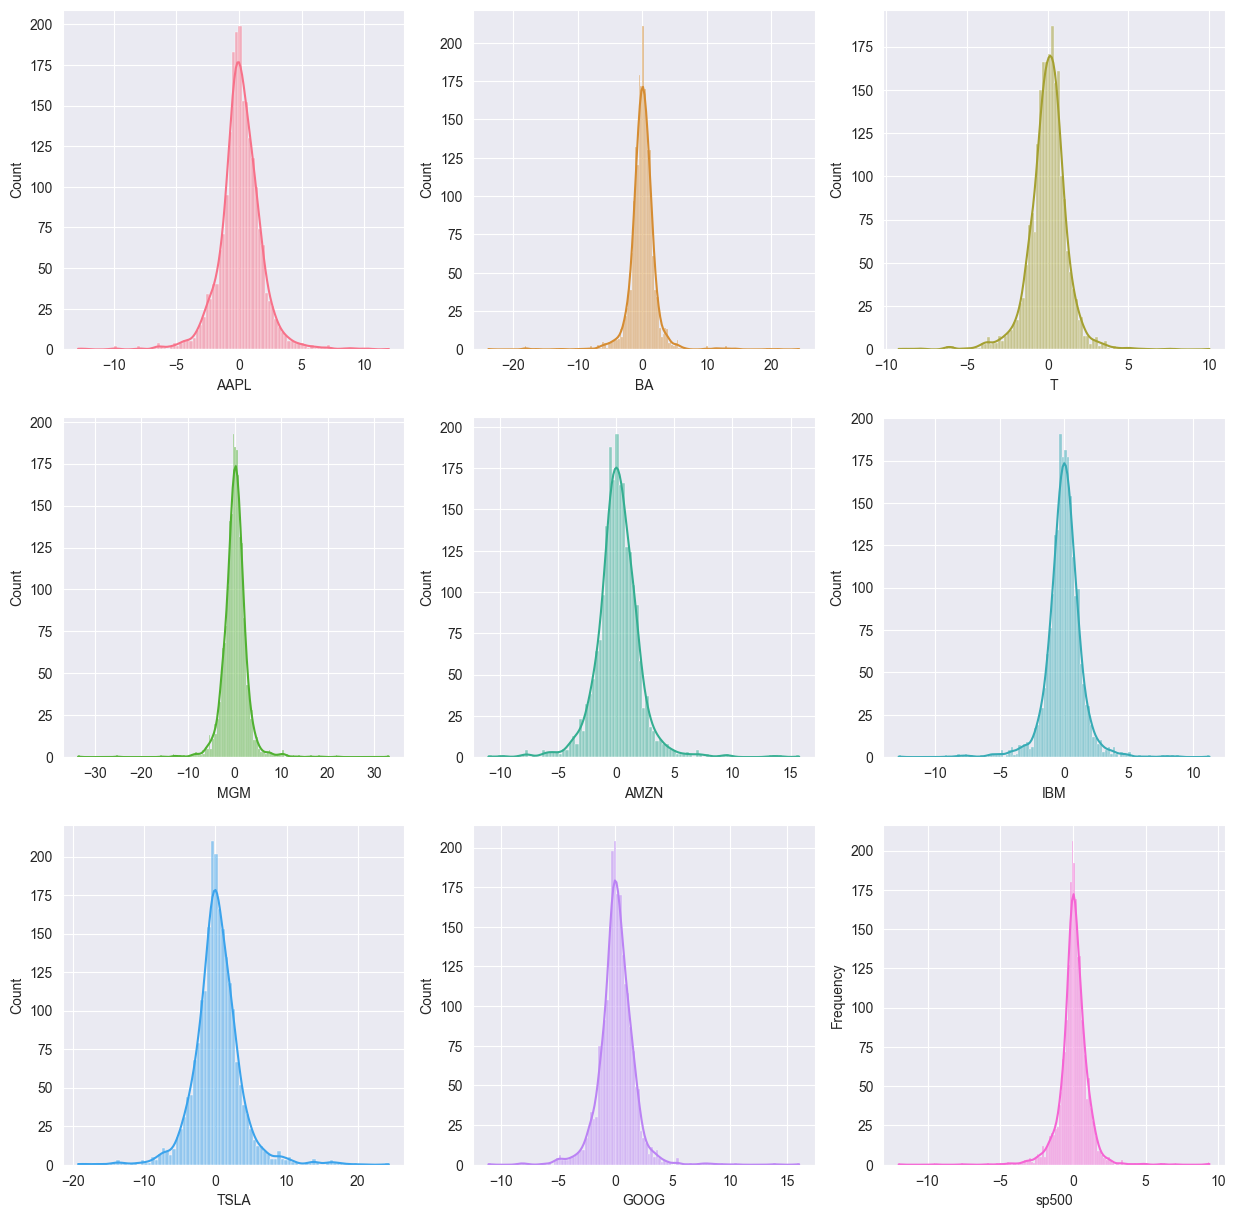

In [109]:
palette = sns.color_palette("husl", 9)

plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in stock_returns.drop('Date', axis=1).columns:
    sns.histplot(stock_returns[i], 
                 label = i, # Set the label as the name of the stock
                 kde = True, # Plot the kernel density estimation
                 ax = ax.flatten()[stock_returns.drop('Date', axis=1).columns.get_loc(i)], # Flatten the axes and select cyclically the right one
                 color = palette[stock_returns.drop('Date', axis=1).columns.get_loc(i)])    # Set the color of the plot

plt.ylabel('Frequency')
plt.show()

As expected, the histograms of the returns are **normally distributed**. This is because the dataset contains a large number of observations.

We can notice that Tesla has the *highest variance* among all stocks. This may be due to the fact that Testa's stock price **increased** a lot during the last two years, as we saw in the previous plots.

Also, we see that the S&P500 has one of the *lowest variance* among all stocks. This is because the S&P500 is an index that is composed of 500 stocks, so it is *less volatile* than a single stock because the risk is diversified. 

### **Optional**: Define a function to perform an interactive and fancy histograms plotsusing Plotly

In [110]:
def plotly_hist(df, title):
    fig = px.histogram(df,
                       x=df.columns[1:], # Avoid plotting the date
                       marginal="box",  # Add the boxplot
                       title=title)
    fig.update_layout(bargap=0.1)
    fig.show()

In [111]:
plotly_hist(stock_returns, 'Histogram of daily returns')

Plotting the distributions of the returns for each stocks can give a better understanding of the **volatility** of the stocks. In fact, we can see that the stocks with the **highest variance** are Tesla and MGM, followed by Apple and Boeing, while the stocks with the **lowest variance** are AT&T and IBM, followed by Google.

If we consider also the S&P500 index, we see that the **variance** of the index is the **lowest** among all stocks. This is because the S&P500 is an index that is composed of 500 stocks, so it is *less volatile* than a single stock because the risk is diversified, as said before.

Also the S&P500 has the highest concentration of returns around the **mean** (which is 0).

## **Task #6**: Portfolio weights
Simulation exercise

### Write a function that will:
- Simulate 1000 portfolios with random weights
- Compute the return, the variance and the Sharpe ratio of each portfolio
- Return the maximum Sharpe ratio and its weights

The function `compute_returns()` takes a dataframe as input and returns a dataframe with the daily returns of the stocks.
The returns can be computed as $log(\frac{P_1}{P_0})$. This approximation comes in handy when data have a higher variability, thus for extreme values, the log returns are more concentrated around the mean than the simple returns.

In [112]:
def compute_returns(df, method='log'):

    returns_df = np.log(df.drop(['Date'], axis=1)/df.drop(['Date'], axis=1).shift(1))

    return returns_df

The function `portfolio_simulation()` takes as arguments a dataframe, the risk-free rate and the number of simulations to perform. By default, the risk-free rate is set to 0 and the number of simulations is set to 20000 to get a consistent result.

Then the function calls the function `compute_returns()` to compute the daily returns of the stocks.\
After that, the function computes the **mean** and the **covariance** of the returns of the stocks, annualized, by multiplying the mean by 252 and the covariance by 252.

Then, the function performs the simulations. For each simulation, it generates a random vector of weights, which sum to 1, and computes the **return**, the **variance** and the **Sharpe ratio** of the portfolio.

The weights are sampled from a **Dirichlet distribution**, which ensures a better exploration of the space of weights with respect to a uniform distribution.

Lastly, the function returns the **maximum Sharpe ratio** and its **weights**, **return** and **standard deviation**, together with the returns, variance, Sharpe ratios 
of all the simulated portfolios, useful for plotting the results

In [113]:
def portfolio_simulation(df, rf=0, n=20000):

    # Compute the returns
    returns = compute_returns(df).drop(['sp500'], axis=1) - rf/252   # The risk-free rate is annualized, so we divide it by 252
    avg_returns = returns.mean() * 252
    cov_matrix = returns.cov() * 252
    
    # Simulation
    portfolio_returns = []
    portfolio_std_devs = []
    sharpe_ratio = []
    weights_list = []
    np.random.seed(42)  # Set the seed to 42 for reproducibility

    for i in tqdm(range(n)):

        # Generating random weights using a Dirichlet distribution
        weights = np.random.dirichlet(np.ones(len(df.drop(['Date', 'sp500'], axis=1).columns)), size=1)[0]

        # # Generating random weights
        # weights = np.random.random(len(df.drop(['Date','sp500'], axis=1).columns))
        # weights /= np.sum(weights)
        
        portfolio_return = np.sum(avg_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe = (portfolio_return)/portfolio_std_dev
        
        portfolio_returns.append(portfolio_return)
        portfolio_std_devs.append(portfolio_std_dev)
        sharpe_ratio.append(sharpe)
        weights_list.append(weights)

    # Find the index of the portfolio with the maximum Sharpe ratio
    ind = np.argmax(sharpe_ratio)
    max_sharpe_ratio = sharpe_ratio[ind]
    max_sharpe_return = portfolio_returns[ind]
    max_sharpe_std_dev = portfolio_std_devs[ind]
    max_sharpe_weights = weights_list[ind]
    
    return portfolio_returns, portfolio_std_devs, sharpe_ratio, max_sharpe_ratio, max_sharpe_return, max_sharpe_std_dev, max_sharpe_weights

We also define the function `plot_frontier()` which takes as inputs all the output of the previous function and plots the **efficient frontier** of the simulated portfolios.
The function plots a scatter plot of the simulated portfolios, with the **standard deviation** on the x-axis and the **return** on the y-axis. The portfolios are colored according to their **Sharpe ratio** and highlights the **maximum Sharpe ratio** portfolio with a red dot.

The function also prints the **return**, **standard deviation** and **Sharpe ratio** of the maximum Sharpe ratio portfolio, together with its **weights**.

In [114]:
def plot_frontier(portfolio_returns,
                  portfolio_std_dev,
                  sharpe_ratio,
                  max_sharpe_ratio,
                  max_sharpe_return,
                  max_sharpe_std_dev,
                  max_sharpe_weights):
    
    plt.figure(figsize=(15, 5))
    sns.color_palette("husl", 9)
    sns.set_style("darkgrid")

    plt.scatter(portfolio_std_dev, portfolio_returns, c=sharpe_ratio, cmap='plasma')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.title('Portfolio Optimization')

    plt.scatter(max_sharpe_std_dev, max_sharpe_return, c='red', s=50, edgecolors='black')
    plt.show()

    print(f'The maximum Sharpe ratio is {round(max_sharpe_ratio, 2)}')
    print(f'The return of the best portfolio is {round(max_sharpe_return, 6)}')
    print(f'The volatility of the best portfolio is {round(max_sharpe_std_dev, 6)}')
    print(f'The weights of the best portfolio are:\n{max_sharpe_weights}')

In [115]:
portfolio_returns, portfolio_std_devs, sharpe_ratio, max_sharpe_ratio, max_sharpe_return, max_sharpe_std_dev, max_sharpe_weights = portfolio_simulation(df)

100%|██████████| 20000/20000 [00:06<00:00, 3204.38it/s]


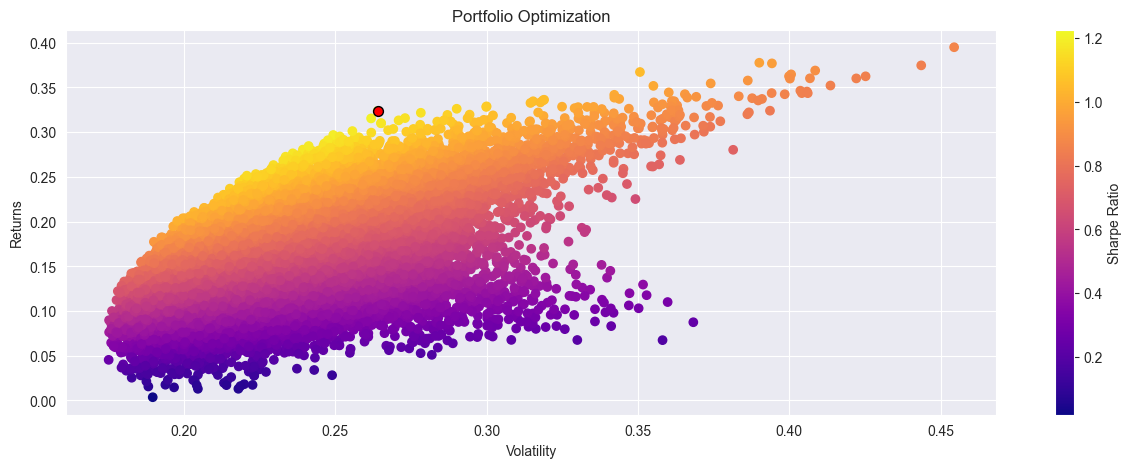

The maximum Sharpe ratio is 1.23
The return of the best portfolio is 0.323681
The volatility of the best portfolio is 0.264028
The weights of the best portfolio are:
[0.15660443 0.02652266 0.00864303 0.00811886 0.59568469 0.00910308
 0.18358305 0.0117402 ]


In [116]:
plot_frontier(portfolio_returns,
              portfolio_std_devs,
              sharpe_ratio,
              max_sharpe_ratio,
              max_sharpe_return,
              max_sharpe_std_dev,
              max_sharpe_weights)

In this initial simulation, it becomes evident that we have successfully identified the weightings that yield the portfolio with the highest Sharpe ratio over the entire period, assuming a risk-free rate (rf) of 0. Additionally, the graphical representation exhibits the characteristic bullet shape, a common feature that encapsulates the spectrum of portfolios, each associated with its corresponding volatility and return. Furthermore, the color coding on the graph serves to illustrate how the Sharpe ratio varies across the range of portfolios.

### Optional:
Define a function that finds the weights that minimize the variance for all possible level or return (i.e., that draw the efficient frontier).\
Plot it against the previous scatter plot.

The Efficienct frontier is basically the frontier formed by all the portfolios which have the lowest risk (or volatility) for any given fixed level of return. To compute those portfolios, we firstly created the function `lowest_risk_portfolio()` to compute the weights related to the portfolio with the lowest risk possible. To accomplish the task we set up a basic constrained minimization problem in which our objective function is the volatility:
$$
\begin{align*}
& vol = \sqrt{(w^T \cdot \Sigma \cdot w)} \quad \text{s.t.} \\
& \sum_{i=1}^{n} w_i = 1, \quad \text{where } w_i \in [0, 1] \text{ for } i = 1, 2, \ldots, n \\
\end{align*}
$$

After determining the appropriate weights for the portfolio, the next step is to compute the actual efficienct frontier. This involves calculating the gap between the maximum attainable return and the minimum attainable return, based on the previously calculated weights. We then divide this gap by the `num_portfolios` variable.

The purpose of introducing `num_portfolios` is to perform the same minimization process as before but with an additional constraint: fixing a target return in advance. This constraint helps us find the weights associated to a portfolio that not only meets the desired return but also has the lowest possible risk, which means that the portfolio obtained is located on the efficient frontier.

In [117]:
# Defining some function to calculate return, volatility and sharpe ratio of a portfolio
def ret(r,w):
    return r.dot(w)


# Risk level - or volatility
def vol(w,covar):
    return np.sqrt(np.dot(w,np.dot(w,covar)))


def sharpe (ret,vol):
    return ret/vol


def lowest_risk_portfolio(df, rf=0):
    
    daily_ret = compute_returns(df).drop(['sp500'], axis =1) - rf/252

    # return_df = (1+ daily_ret.mean())**252-1
    return_df = daily_ret.mean()*252

    asset_num = len(df.drop(['Date','sp500'], axis=1).columns)
    cov_matrix = daily_ret.cov()*252

    # Defining weight bounds
    bounds = Bounds(0,1)
    
    # Defining sum(weights) = 1 constraint
    constraints = LinearConstraint(np.ones(asset_num), 1,1)
    
    # Initial guess of weights (all equal)
    x0 = np.ones(asset_num)/asset_num
    
    # Minimizing volatility
    res = minimize(vol, x0, args=(cov_matrix), method='trust-constr', constraints=constraints, bounds=bounds)
    w_min_vol = res.x
    
    return w_min_vol


def compute_efficient_frontier(df, rf=0, num_portfolios=500):

    # daily_ret = df.drop(['Date','sp500'], axis=1).pct_change()
    daily_ret = compute_returns(df).drop(['sp500'], axis =1) - rf/252

    return_df = daily_ret.mean()*252
    
    asset_num = len(df.drop(['Date', 'sp500'], axis=1).columns)
    cov_matrix = daily_ret.cov()*252
    
    w = lowest_risk_portfolio(df, rf=rf)
    steps = (np.max(return_df) - ret(w, return_df))/num_portfolios
    
    all_weights = []
    all_returns = []
    all_vol = []

    for i in tqdm(range(num_portfolios)):

        fixed_return = ret(w, return_df) + i*steps

        # Defining weight bounds
        bounds = Bounds(0,1)

        # Defining sum(weights) = 1 constraint and fixed return
        constraints = LinearConstraint([np.ones(asset_num),return_df], [1,fixed_return], [1,fixed_return])

        # Initial guess of weights, the weights of minimum volatility portfolio
        x0 = w
        res = minimize(vol, x0, args=(cov_matrix), method='trust-constr', constraints=constraints, bounds=bounds)
        w_new = res.x
        all_returns.append(fixed_return)
        all_vol.append(vol(w_new, cov_matrix))

    return all_returns, all_vol

In [118]:
all_returns, all_vol = compute_efficient_frontier(df)

100%|██████████| 500/500 [00:16<00:00, 30.13it/s]


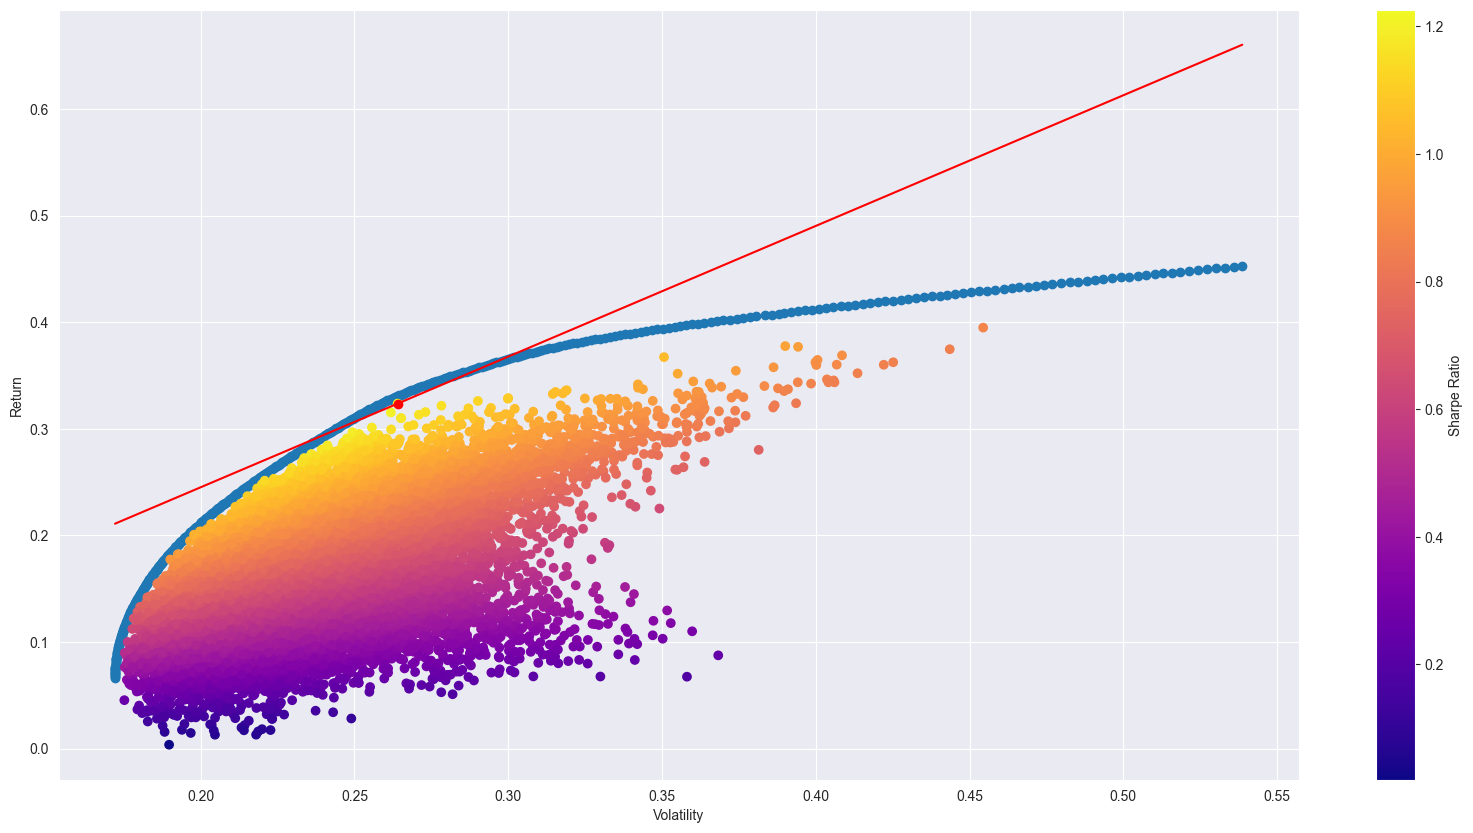

In [119]:
plt.figure(figsize=(20,10))

# Plotting the simulated portfolios
plt.scatter(all_vol, all_returns)
plt.scatter(portfolio_std_devs, portfolio_returns, c=sharpe_ratio, cmap='plasma')
plt.plot(max_sharpe_std_dev, max_sharpe_return, 'ro')

# Plotting the tangency line
x = np.linspace(min(all_vol), max(all_vol), 200)
y = max_sharpe_ratio * x
plt.plot(x, y, '-r', label='Sharpe ratio')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

### Including Risk Free Asset

In [120]:
rf_asset = pd.read_csv('./data/10-years-treasury-bills.csv')
rf_asset['value'] = rf_asset['value'] / 100
rf_asset['Date'] = pd.to_datetime(rf_asset['date'])
rf_asset = rf_asset[['Date', 'value']]
rf_asset = rf_asset[(rf_asset['Date'] >= min(df['Date'])) & (rf_asset['Date'] <= max(df['Date']))]
rf_asset.head()

Date   value
12491 2012-01-12  0.0194
12492 2012-01-13  0.0189
12493 2012-01-17  0.0187
12494 2012-01-18  0.0192
12495 2012-01-19  0.0201

In [121]:
rf = rf_asset['value'].mean()
rf

0.02163730207852194

In [122]:
portfolio_returns_rf1, portfolio_std_devs_rf1, sharpe_ratio_rf1, max_sharpe_ratio_rf1, max_sharpe_return_rf1, max_sharpe_std_dev_rf1, max_sharpe_weights_rf1 = portfolio_simulation(df, rf=rf)

100%|██████████| 20000/20000 [00:06<00:00, 3179.14it/s]


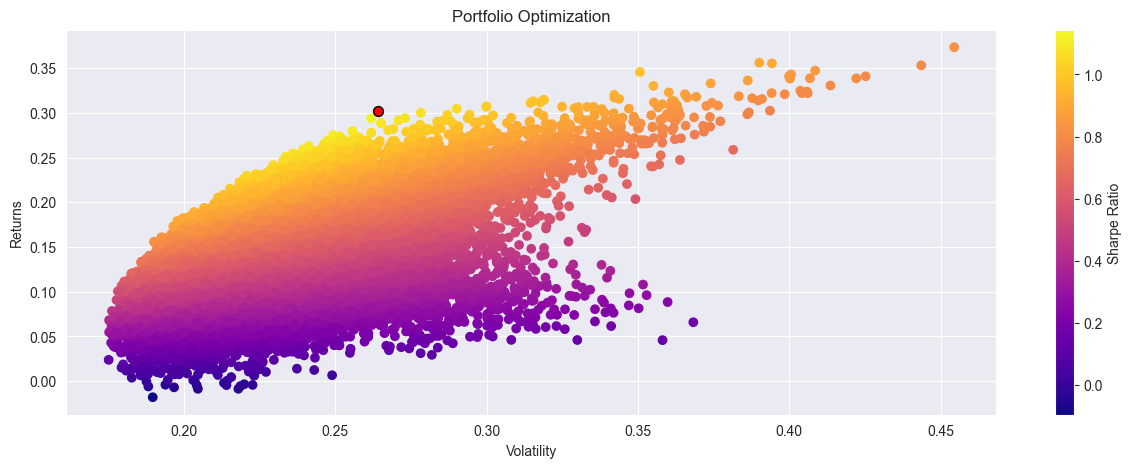

The maximum Sharpe ratio is 1.14
The return of the best portfolio is 0.302043
The volatility of the best portfolio is 0.264028
The weights of the best portfolio are:
[0.15660443 0.02652266 0.00864303 0.00811886 0.59568469 0.00910308
 0.18358305 0.0117402 ]


In [123]:
plot_frontier(portfolio_returns_rf1,
              portfolio_std_devs_rf1,
              sharpe_ratio_rf1,
              max_sharpe_ratio_rf1,
              max_sharpe_return_rf1,
              max_sharpe_std_dev_rf1,
              max_sharpe_weights_rf1)

In [124]:
all_returns_rf1, all_vol_rf1 = compute_efficient_frontier(df, rf=rf)

100%|██████████| 500/500 [00:16<00:00, 29.79it/s]


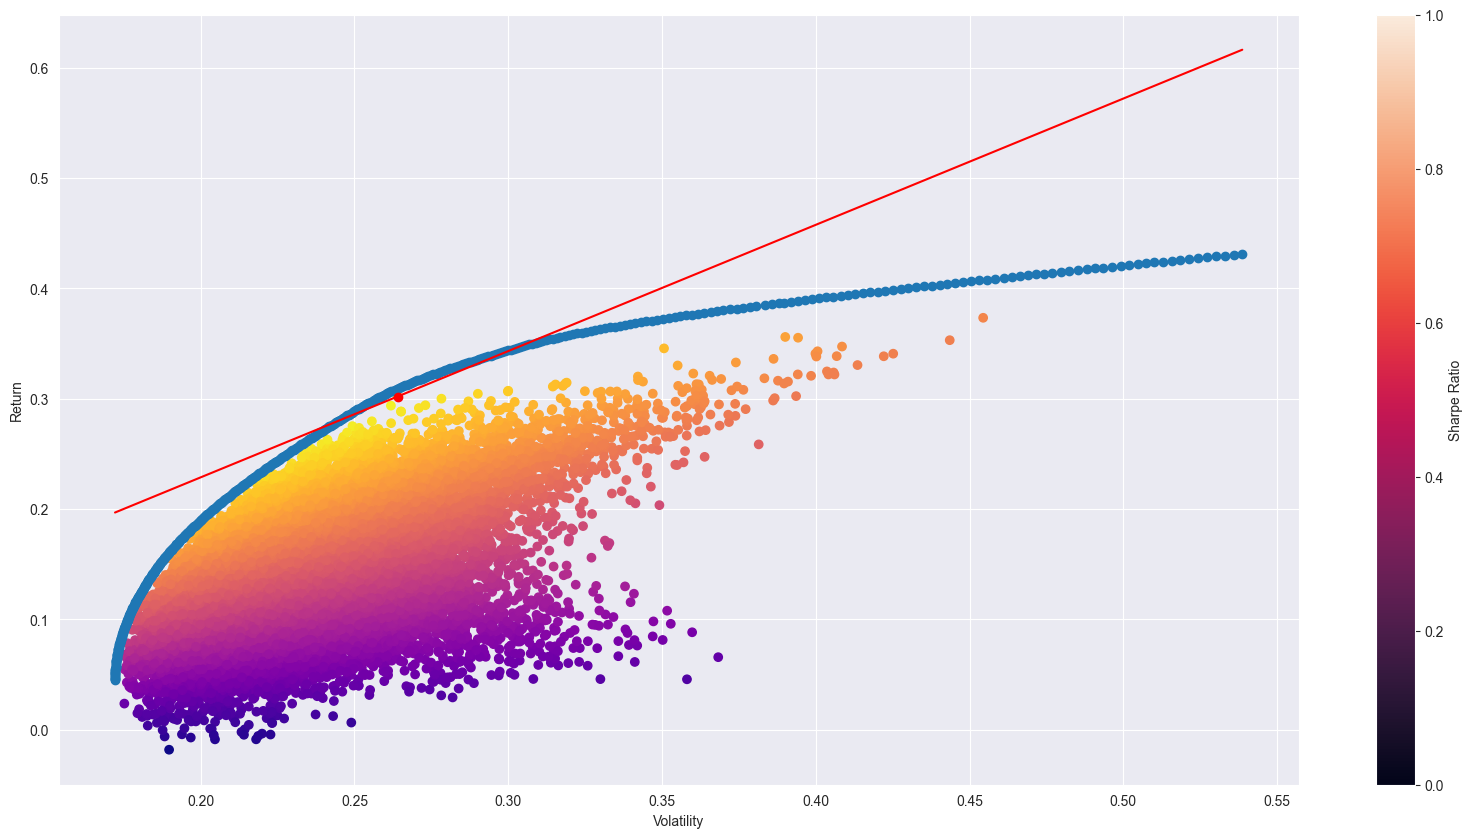

In [125]:
plt.figure(figsize=(20,10))

# Plotting the simulated portfolios
plt.scatter(portfolio_std_devs_rf1, portfolio_returns_rf1, c=sharpe_ratio, cmap='plasma')
plt.scatter(all_vol_rf1, all_returns_rf1)

plt.plot(max_sharpe_std_dev_rf1, max_sharpe_return_rf1, 'ro')

# Plotting the tangency line
x = np.linspace(min(all_vol_rf1), max(all_vol_rf1), 200)
y = max_sharpe_ratio_rf1 * x
plt.plot(x, y, '-r', label='Sharpe ratio')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

### Comments about the difference between risk free = 0 and positive risk free

In the second simulation graphs, it's evident that introducing a positive value for the risk-free asset has reduced the portfolio's return by around 2 percentage points. This decrease in return is in line with expectations, as the Sharpe ratio, which is calculated as the portfolio return rate minus the risk-free rate in the numerator, has also decreased. Additionally, doing simulations including a positive and not arbitrary risk free rate improve the accuracy of the analysis.

# Task #6: Testing Portfolio Theory

### Re-run Task #6 but only on the first part of the sample (2012-2016)
- Find out what are the optimal weights for this period
- Simulate your optimal portfolio on the second part of the sample (2016-end)

In [126]:
# Consider only the first part of the dataset (2012-2016)

df_first_part = df[df['Date'] < '2017-01-01']
df_first_part.tail()

Date        AAPL          BA          T        MGM        AMZN  \
1246  2016-12-23  116.519997  157.809998  42.730000  29.360001  760.590027   
1247  2016-12-27  117.260002  157.479996  42.650002  29.010000  771.400024   
1248  2016-12-28  116.760002  156.100006  42.520000  28.719999  772.130005   
1249  2016-12-29  116.730003  155.690002  42.660000  28.500000  765.150024   
1250  2016-12-30  115.820000  155.679993  42.529999  28.830000  749.869995   

             IBM        TSLA        GOOG        sp500  
1246  166.710007  213.339996  789.909973  2263.790039  
1247  167.139999  219.529999  791.549988  2268.879883  
1248  166.190002  219.740005  785.049988  2249.919922  
1249  166.600006  214.679993  782.789978  2249.260010  
1250  165.990005  213.690002  771.820007  2238.830078

In [127]:
portfolio_returns_1p, portfolio_std_devs_1p, sharpe_ratio_1p, max_sharpe_ratio_1p, max_sharpe_return_1p, max_sharpe_std_dev_1p, max_sharpe_weights_1p = portfolio_simulation(df_first_part)

100%|██████████| 20000/20000 [00:06<00:00, 3222.07it/s]


How does it perform ?

100%|██████████| 20000/20000 [00:06<00:00, 3251.77it/s]


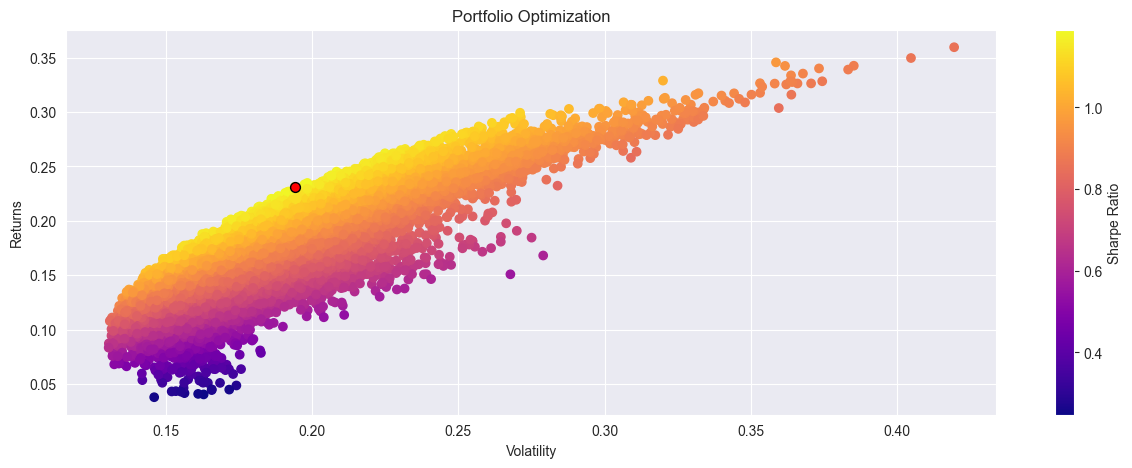

The maximum Sharpe ratio is 1.19
The return of the best portfolio is 0.231075
The volatility of the best portfolio is 0.194126
The weights of the best portfolio are:
[0.08135527 0.18447754 0.0984542  0.00313907 0.32446199 0.00160039
 0.15719159 0.14931995]


In [128]:
plot_frontier(*portfolio_simulation(df_first_part))

### Plot the expected (measured over the 1st period) vs. the realized return and volatility (over the second).

In [129]:
df_second_part = df[df['Date'] >= '2017-01-01']

In [130]:
portfolio_returns_2p, portfolio_std_devs_2p, sharpe_ratio_2p, max_sharpe_ratio_2p, max_sharpe_return_2p, max_sharpe_std_dev_2p, max_sharpe_weights_2p = portfolio_simulation(df_second_part)

100%|██████████| 20000/20000 [00:06<00:00, 3206.29it/s]


In [133]:
returns = compute_returns(df_second_part.drop(['sp500'], axis=1))
avg_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
portfolio_return = np.sum(avg_returns * max_sharpe_weights_1p)
portfolio_std_dev = np.sqrt(np.dot(max_sharpe_weights_1p.T, np.dot(cov_matrix, max_sharpe_weights_1p)))
sharpe = (portfolio_return)/portfolio_std_dev 

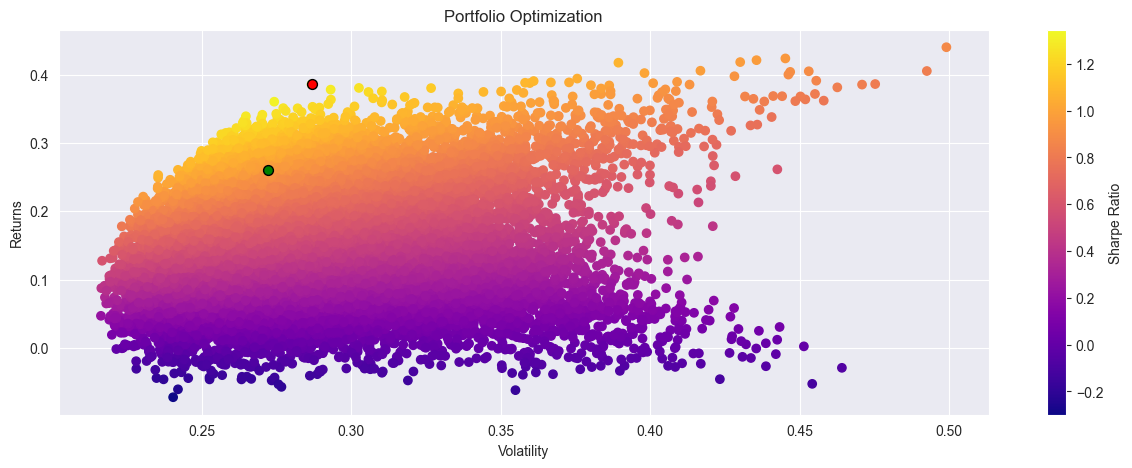

The maximum Sharpe ratio is 1.345381
The return of the best portfolio for the second part of the dataset is 0.385696
The volatility of the best portfolio for the second part of the dataset is 0.286681
The weights of the best portfolio for the second part of the dataset are:
[0.15660443 0.02652266 0.00864303 0.00811886 0.59568469 0.00910308
 0.18358305 0.0117402 ]
---------------------------------------------------------------------------------------------------------
The sharp ratio of the portfolio using the weights of the first part of the dataset is 0.958618
The return of the portfolio using the weights of the first part of the dataset is 0.260752
The volatility of the portfolio using the weights of the first part of the dataset is 0.272009


In [134]:
plt.figure(figsize=(15, 5))
sns.color_palette("husl", 9)
sns.set_style("darkgrid")

plt.scatter(portfolio_std_devs_2p, portfolio_returns_2p, c=sharpe_ratio_2p, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Portfolio Optimization')

plt.scatter(max_sharpe_std_dev_2p, max_sharpe_return_2p, c='red', s=50, edgecolors='black')
plt.scatter(portfolio_std_dev, portfolio_return, c='green', s=50, edgecolors='black')
plt.show()

print(f'The maximum Sharpe ratio is {max_sharpe_ratio_2p:.6f}')
print(f'The return of the best portfolio for the second part of the dataset is {max_sharpe_return_2p:.6f}')
print(f'The volatility of the best portfolio for the second part of the dataset is {max_sharpe_std_dev_2p:.6f}')
print(f'The weights of the best portfolio for the second part of the dataset are:\n{max_sharpe_weights_2p}')

print(f'---------------------------------------------------------------------------------------------------------')

print(f'The sharp ratio of the portfolio using the weights of the first part of the dataset is {sharpe:.6f}')
print(f'The return of the portfolio using the weights of the first part of the dataset is {portfolio_return:.6f}')
print(f'The volatility of the portfolio using the weights of the first part of the dataset is {portfolio_std_dev:.6f}')



If we take a look at the graph with historical data from 2012 to 2016 and use those weightings to calculate portfolio returns for the next period, something interesting pops up. The portfolio still manages to maintain a decent Sharpe ratio, hovering around one, which isn't bad at all. However, it falls quite short of what we'd expect on the efficient frontier. In fact, even though the variance decrease a little compared to the optimal portfolio, the return rate decreased sharply. This suggests that the weights we initially computed using data from the first period aren't the best fit for the second period. It's possible that market changes or other factors have caused the market to behave differently in the later period.

## Super optional:
Let’s go a step further. Every year, you re-balance your portfolio based on last year data. What is your performance overall?

In [135]:
df['Date'] = pd.to_datetime(df['Date'])
df

Date        AAPL          BA          T        MGM         AMZN  \
0    2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1    2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2    2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3    2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4    2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...         ...         ...         ...        ...        ...          ...   
2154 2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155 2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156 2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157 2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158 2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

Minimize the sharpe ratio to find the optimal weights each year.

In [136]:
def best_sharpe(df, rf=0):

    daily_ret = np.log(df.drop(['Date','sp500'], axis=1)/df.drop(['Date','sp500'], axis=1).shift(1)) - rf/252
    return_df = daily_ret.mean()*252

    asset_num = len(df.drop(['Date','sp500'], axis=1).columns)
    cov_matrix = daily_ret.cov()*252

    bounds = Bounds(0,1)
    
    constraints = LinearConstraint(np.ones(asset_num), 1,1)
    x0 = np.ones(asset_num)/asset_num

    fun2 = lambda w: np.sqrt(np.dot(w, np.dot(w, cov_matrix))) / return_df.dot(w)
    res_sharpe = minimize(fun2, x0, method='trust-constr', constraints=constraints, bounds=bounds)

    w_sharpe = res_sharpe.x

    return w_sharpe


def dynamic_portfolio_optimization(df, weights, rf=0):

    wins = 0

    for year in df.Date.dt.year.unique():

        df_year = df[df.Date.dt.year == year].reset_index(drop=True)

        print(f'\nYear: {year}')

        returns = compute_returns(df_year.drop(['sp500'], axis=1)) - rf/252
        avg_returns = returns.mean() * 252
        cov_matrix = returns.cov() * 252

        portfolio_return = np.sum(avg_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe = (portfolio_return)/portfolio_std_dev

        if portfolio_return > 0: wins += 1

        portfolio_returns, portfolio_std_devs, sharpe_ratio, max_sharpe_ratio, max_sharpe_return, max_sharpe_std_dev, max_sharpe_weights = portfolio_simulation(df_year, rf=rf)

        plt.figure(figsize=(15, 5))
        sns.color_palette("husl", 9)
        sns.set_style("darkgrid")

        plt.scatter(portfolio_std_devs, portfolio_returns, c=sharpe_ratio, cmap='plasma')
        plt.colorbar(label='Sharpe Ratio')
        plt.xlabel('Volatility')
        plt.ylabel('Returns')
        plt.title('Portfolio Optimization')

        plt.scatter(max_sharpe_std_dev, max_sharpe_return, c='red', s=50, edgecolors='black')
        plt.scatter(portfolio_std_dev, portfolio_return, c='green', s=50, edgecolors='black')
        plt.show()

        print(f'The maximum Sharpe ratio is {max_sharpe_ratio:.6f}')
        print(f'The return of the best portfolio for this year is {max_sharpe_return:.6f}')
        print(f'The volatility of the best portfolio this year is {max_sharpe_std_dev:.6f}')

        print(f'---------------------------------------------------------------------------------------------------------')

        print(f'The Sharpe ratio of the portfolio using the weights based on the previous year data is {sharpe:.6f}')
        print(f'The return of the portfolio using the weights based on the previous year data is {portfolio_return:.6f}')
        print(f'The volatility of the portfolio using the weights based on the previous year data is {portfolio_std_dev:.6f}')

        weights = best_sharpe(df_year, rf=rf) # we decide to use the weights of the best sharpe ratio calculated by minimizing the volatility instead of taking the value from the simulation to be more precise

    print(f'We beat the market {wins/len(df.Date.dt.year.unique())*100}% of the time')

In [139]:
initial_weights = np.ones(8)/8
rf = float(compute_returns(df[['Date','sp500']]).mean() * 252)
rf

0.11037355472228691


Year: 2012


100%|██████████| 20000/20000 [00:06<00:00, 3250.17it/s]


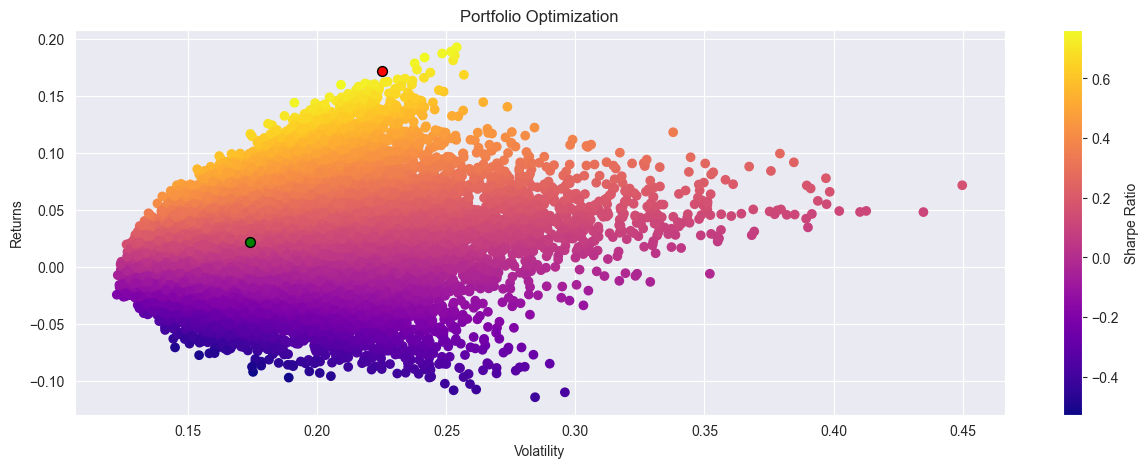

The maximum Sharpe ratio is 0.762920
The return of the best portfolio for this year is 0.171658
The volatility of the best portfolio this year is 0.225001
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is 0.124831
The return of the portfolio using the weights based on the previous year data is 0.021696
The volatility of the portfolio using the weights based on the previous year data is 0.173805

Year: 2013


100%|██████████| 20000/20000 [00:06<00:00, 3263.61it/s]


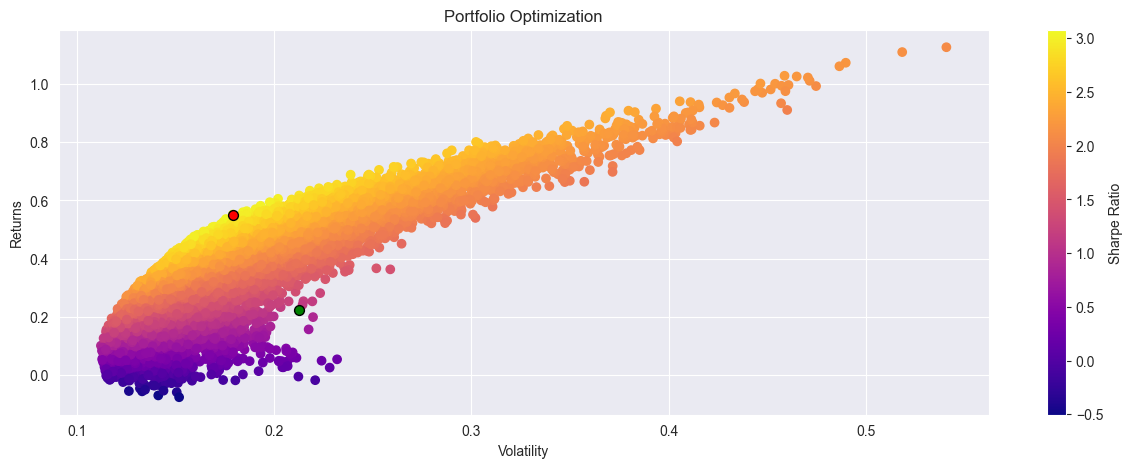

The maximum Sharpe ratio is 3.079738
The return of the best portfolio for this year is 0.551515
The volatility of the best portfolio this year is 0.179078
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is 1.055131
The return of the portfolio using the weights based on the previous year data is 0.224188
The volatility of the portfolio using the weights based on the previous year data is 0.212475

Year: 2014


100%|██████████| 20000/20000 [00:06<00:00, 3266.79it/s]


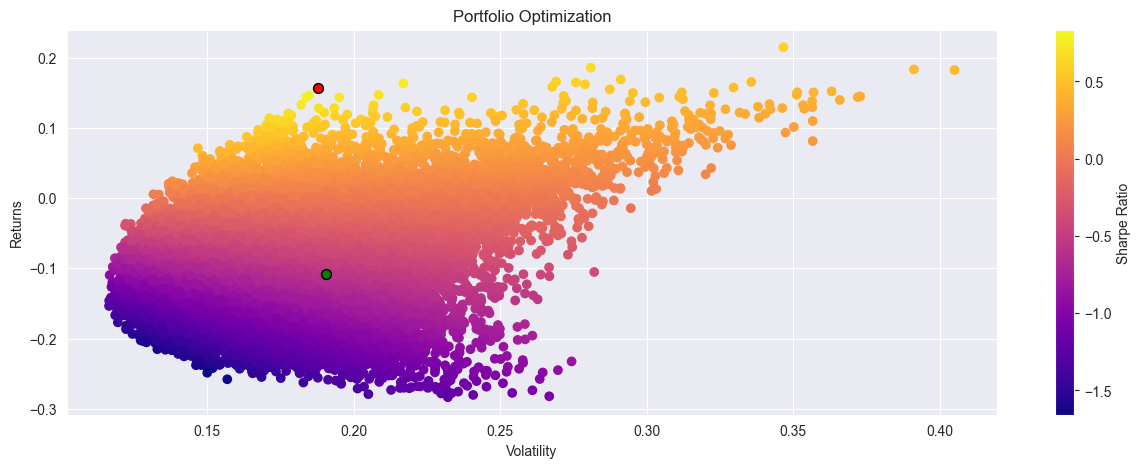

The maximum Sharpe ratio is 0.834802
The return of the best portfolio for this year is 0.156713
The volatility of the best portfolio this year is 0.187725
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is -0.566295
The return of the portfolio using the weights based on the previous year data is -0.107995
The volatility of the portfolio using the weights based on the previous year data is 0.190704

Year: 2015


100%|██████████| 20000/20000 [00:06<00:00, 3272.59it/s]


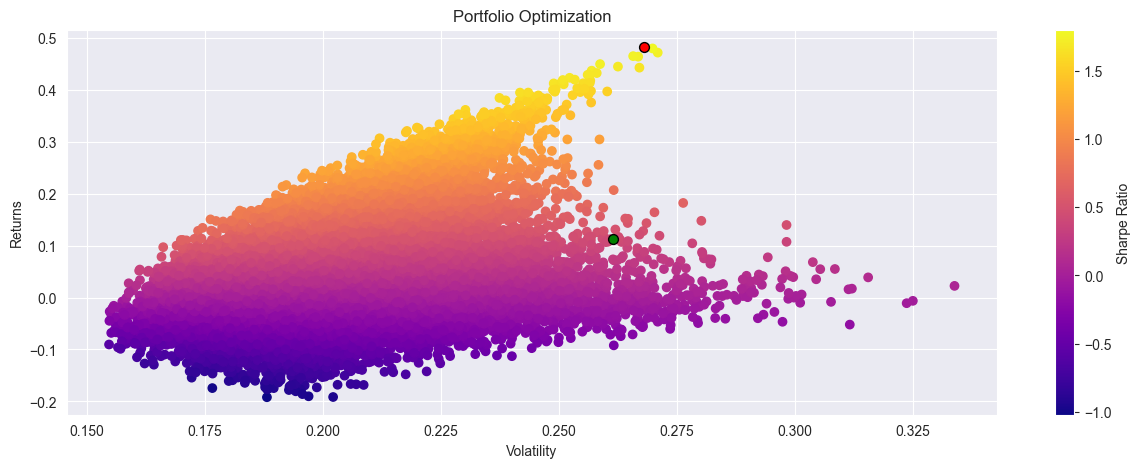

The maximum Sharpe ratio is 1.799255
The return of the best portfolio for this year is 0.482361
The volatility of the best portfolio this year is 0.268089
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is 0.428227
The return of the portfolio using the weights based on the previous year data is 0.111950
The volatility of the portfolio using the weights based on the previous year data is 0.261427

Year: 2016


100%|██████████| 20000/20000 [00:06<00:00, 3242.23it/s]


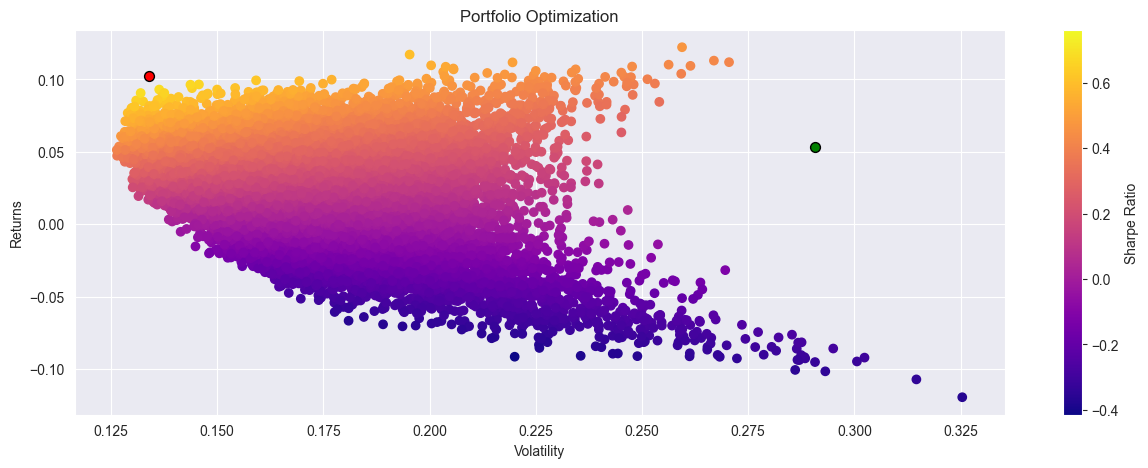

The maximum Sharpe ratio is 0.762910
The return of the best portfolio for this year is 0.102249
The volatility of the best portfolio this year is 0.134024
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is 0.183407
The return of the portfolio using the weights based on the previous year data is 0.053309
The volatility of the portfolio using the weights based on the previous year data is 0.290657

Year: 2017


100%|██████████| 20000/20000 [00:06<00:00, 3261.00it/s]


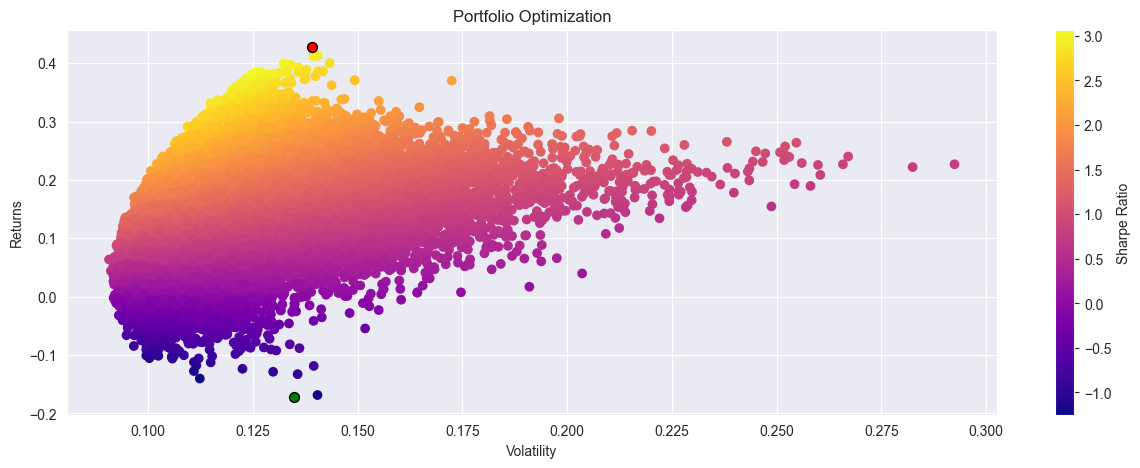

The maximum Sharpe ratio is 3.069446
The return of the best portfolio for this year is 0.427298
The volatility of the best portfolio this year is 0.139210
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is -1.279078
The return of the portfolio using the weights based on the previous year data is -0.172427
The volatility of the portfolio using the weights based on the previous year data is 0.134806

Year: 2018


100%|██████████| 20000/20000 [00:06<00:00, 3215.44it/s]


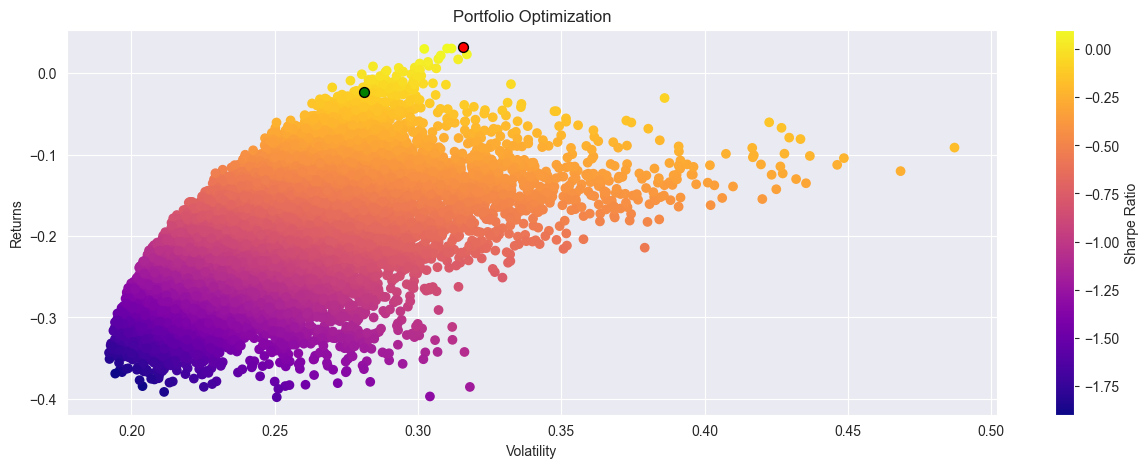

The maximum Sharpe ratio is 0.100519
The return of the best portfolio for this year is 0.031735
The volatility of the best portfolio this year is 0.315712
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is -0.084195
The return of the portfolio using the weights based on the previous year data is -0.023677
The volatility of the portfolio using the weights based on the previous year data is 0.281223

Year: 2019


100%|██████████| 20000/20000 [00:06<00:00, 3248.35it/s]


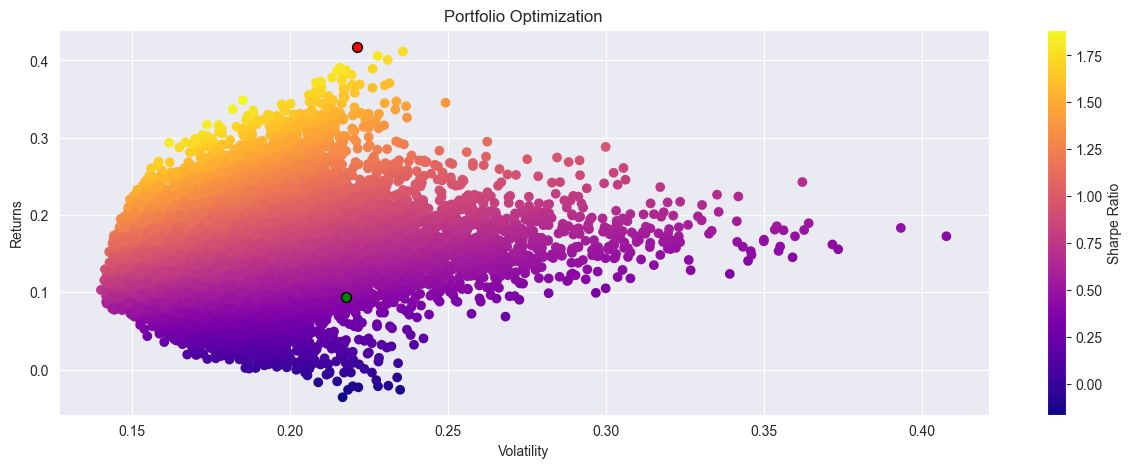

The maximum Sharpe ratio is 1.886724
The return of the best portfolio for this year is 0.417154
The volatility of the best portfolio this year is 0.221100
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is 0.429711
The return of the portfolio using the weights based on the previous year data is 0.093508
The volatility of the portfolio using the weights based on the previous year data is 0.217606

Year: 2020


100%|██████████| 20000/20000 [00:06<00:00, 3256.71it/s]


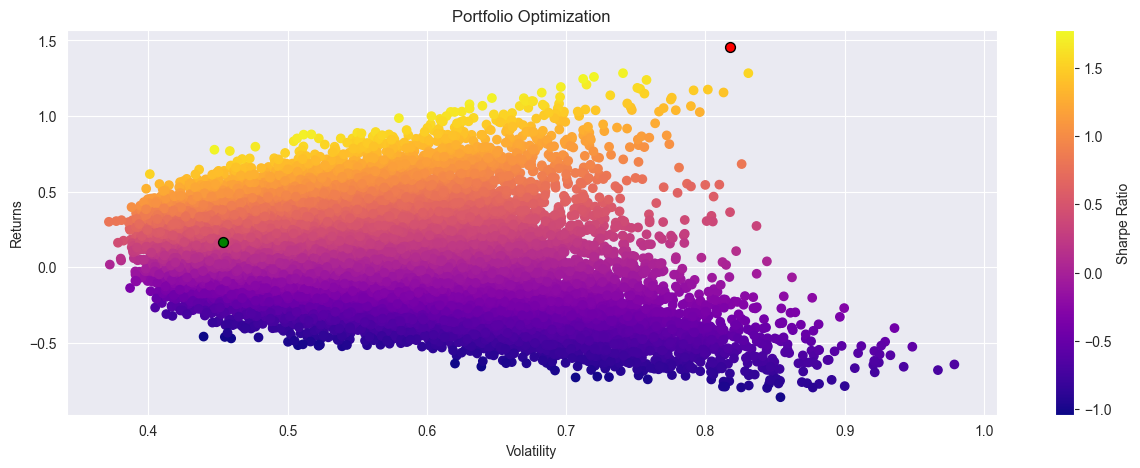

The maximum Sharpe ratio is 1.778461
The return of the best portfolio for this year is 1.454495
The volatility of the best portfolio this year is 0.817839
---------------------------------------------------------------------------------------------------------
The Sharpe ratio of the portfolio using the weights based on the previous year data is 0.373194
The return of the portfolio using the weights based on the previous year data is 0.169346
The volatility of the portfolio using the weights based on the previous year data is 0.453776
We beat the market 66.66666666666666% of the time


In [138]:
dynamic_portfolio_optimization(df, initial_weights, rf)

### Comments
In this simulation, we initially assigned equal weights to the portfolio and subsequently adjusted them based on the market performance in the preceding year. The simulation includes data for every available year, allowing us to make informed decisions. Furthermore, we calculated the annual returns using the S&P 500 as a benchmark. To understand better were our portfolio placed every year we plotted it in the graph